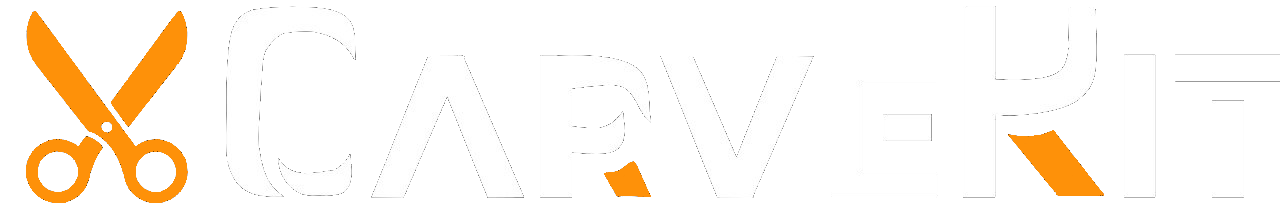

### Automated high-quality background removal framework for an image using neural networks



- 🏢 [Project at GitHub](https://github.com/OPHoperHPO/image-background-remove-tool) 🏢
- 🔗 [Author at GitHub](https://github.com/OPHoperHPO) 🔗

> Please rate our repository with ⭐ if you like our work! Thanks! 😀

This notebook supports **Google Colab GPU runtime**. 

> **Enabling and testing the GPU** \
> Navigate to `Edit → Notebook Settings`. \
> Select `GPU` from the `Hardware Accelerator` drop-down.

# Install CarveKit

In [ ]:
#@title Clone repository (Click the arrow on the left)

!git clone https://github.com/OPHoperHPO/image-background-remove-tool.git carvekit --depth 1

%cd /content/carvekit

_ = open('requirements.txt').read().replace('pillow~=8.1.2', 'pillow')
open('requirements.txt', 'w').write(_)
!pip install -r requirements.txt --extra-index-url https://download.pytorch.org/whl/cu113


In [8]:
#@title Download all models
from carvekit.ml.files.models_loc import download_all

download_all();

# Remove background using CarveKit

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:749: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


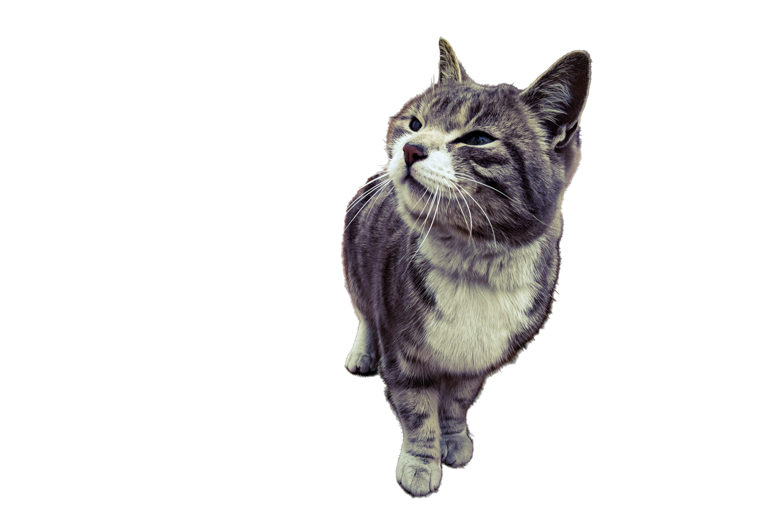

In [9]:
#@title Upload images from your computer
import torch
from IPython import display
from google.colab import files
from carvekit.api.high import HiInterface

SHOW_FULLSIZE = False #@param {type:"boolean"}

#@markdown Description of parameters
#@markdown - `SHOW_FULLSIZE`  - Shows image in full size (may take a long time to load)

interface = HiInterface(batch_size_seg=5,
                        batch_size_matting=1, 
                        device='cuda' if torch.cuda.is_available() else 'cpu',
                        seg_mask_size=320, matting_mask_size=2048)




uploaded = files.upload().keys()
display.clear_output()
images = interface(uploaded)
for im in enumerate(images):
  if not SHOW_FULLSIZE:
    im[1].thumbnail((768, 768), resample=3)
  display.display(im[1])

